# GA Project - Predicting House Prices in Ames, Iowa

# Part 2 

# Step-1 Import Libraries

In [135]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.linear_model import LinearRegression, LassoCV, Lasso, RidgeCV, Ridge
from sklearn.preprocessing import PowerTransformer, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.metrics import r2_score
from sklearn import metrics

pd.options.display.max_rows = 500
pd.options.display.max_columns = 500

%matplotlib inline

# Step-2 Load Data

In [136]:
%store -r train
%store -r test

In [137]:
# Convert all columns to lowercase and replace spaces in column names.
train.columns = train.columns.str.lower().str.replace(' ', '_')

In [138]:
train.head()

,id,ms_subclass,lot_frontage,lot_area,lot_shape,land_contour,utilities,lot_config,land_slope,neighborhood,condition_1,condition_2,bldg_type,house_style,overall_qual,overall_cond,year_built,year_remod/add,roof_style,roof_matl,exterior_1st,exterior_2nd,mas_vnr_type,mas_vnr_area,exter_qual,exter_cond,foundation,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating,heating_qc,central_air,electrical,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,garage_type,garage_yr_blt,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,misc_val,mo_sold,yr_sold,sale_type,saleprice
0,109,60,69.0552,13517,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,Norm,1Fam,2Story,6,8,1976,2005,Gable,CompShg,HdBoard,Plywood,BrkFace,289.0,Gd,TA,CBlock,TA,TA,No,GLQ,533.0,Unf,0.0,192.0,725.0,GasA,Ex,Y,SBrkr,725,754,0,1479,0.0,0.0,2,1,3,1,Gd,6,Typ,0,Attchd,1976.0,RFn,2.0,475.0,TA,TA,Y,0,44,0,0,0,0,0,3,2010,WD,130500
1,544,60,43.0000,11492,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,VinylSd,VinylSd,BrkFace,132.0,Gd,TA,PConc,Gd,TA,No,GLQ,637.0,Unf,0.0,276.0,913.0,GasA,Ex,Y,SBrkr,913,1209,0,2122,1.0,0.0,2,1,4,1,Gd,8,Typ,1,Attchd,1997.0,RFn,2.0,559.0,TA,TA,Y,0,74,0,0,0,0,0,4,2009,WD,220000
2,153,20,68.0000,7922,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,7,1953,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,Gd,CBlock,TA,TA,No,GLQ,731.0,Unf,0.0,326.0,1057.0,GasA,TA,Y,SBrkr,1057,0,0,1057,1.0,0.0,1,0,3,1,Gd,5,Typ,0,Detchd,1953.0,Unf,1.0,246.0,TA,TA,Y,0,52,0,0,0,0,0,1,2010,WD,109000
3,318,60,73.0000,9802,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,2Story,5,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,384.0,384.0,GasA,Gd,Y,SBrkr,744,700,0,1444,0.0,0.0,2,1,3,1,TA,7,Typ,0,BuiltIn,2007.0,Fin,2.0,400.0,TA,TA,Y,100,0,0,0,0,0,0,4,2010,WD,174000
4,255,50,82.0000,14235,IR1,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,1.5Fin,6,8,1900,1993,Gable,CompShg,Wd Sdng,Plywood,None,0.0,TA,TA,PConc,Fa,Gd,No,Unf,0.0,Unf,0.0,676.0,676.0,GasA,TA,Y,SBrkr,831,614,0,1445,0.0,0.0,2,0,3,1,TA,6,Typ,0,Detchd,1957.0,Unf,2.0,484.0,TA,TA,N,0,59,0,0,0,0,0,3,2010,WD,138500


In [139]:
train.shape

(2051, 73)

# Step-3 Data Separation

## 3.1 Remove Outliers
As the notice from dataset, there are some outliers need to remove.

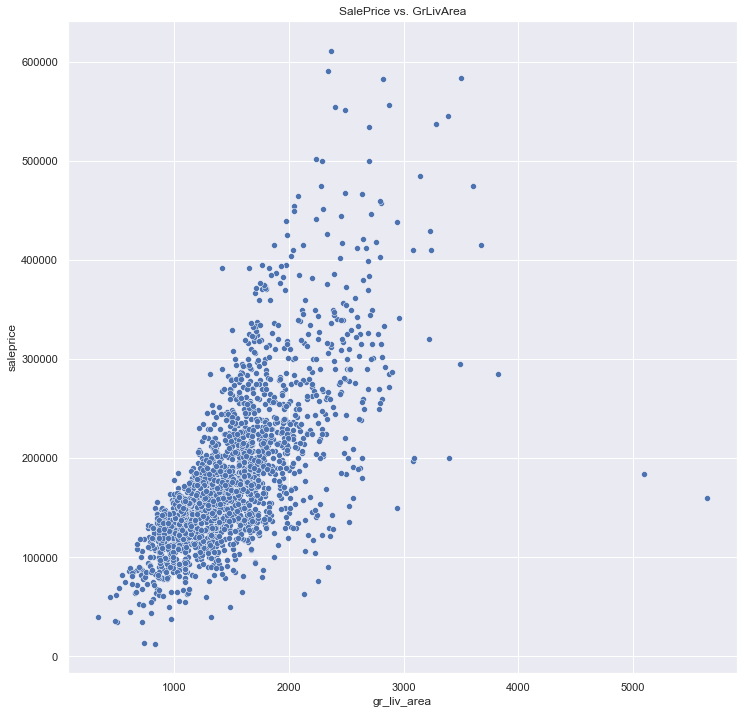

In [140]:
# Visualize outliers

plt.figure(figsize=(12, 12))
sns.scatterplot(data=train, x='gr_liv_area', y='saleprice')
plt.title('SalePrice vs. GrLivArea');

In [141]:
train[['gr_liv_area', 'saleprice']].sort_values(by='gr_liv_area', ascending=False).head()

,gr_liv_area,saleprice
960,5642,160000
1885,5095,183850
616,3820,284700
1897,3672,415000
1035,3608,475000


1499 and 2181 are outliers

In [142]:
train.drop([960, 1885], inplace=True)

## 3.2 Set up X value and y value

## Model Prep: Create our features matrix (X) and target vector (y)
Every numerical column (that is not our target) will be used as a feature.

In [185]:
features = [col for col in train._get_numeric_data().columns if col != 'saleprice']
X = train[features]
y = train['saleprice']

## EDA: Plot a Heatmap of the Correlation Matrix

In [144]:
train_dummies = pd.get_dummies(X, drop_first=True)
train_dummies

,id,ms_subclass,lot_frontage,lot_area,overall_qual,overall_cond,year_built,year_remod/add,mas_vnr_area,bsmtfin_sf_1,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,totrms_abvgrd,fireplaces,garage_yr_blt,garage_cars,garage_area,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,misc_val,mo_sold,yr_sold
0,109,60,69.0552,13517,6,8,1976,2005,289.0,533.0,0.0,192.0,725.0,725,754,0,1479,0.0,0.0,2,1,3,1,6,0,1976.0,2.0,475.0,0,44,0,0,0,0,0,3,2010
1,544,60,43.0000,11492,7,5,1996,1997,132.0,637.0,0.0,276.0,913.0,913,1209,0,2122,1.0,0.0,2,1,4,1,8,1,1997.0,2.0,559.0,0,74,0,0,0,0,0,4,2009
2,153,20,68.0000,7922,5,7,1953,2007,0.0,731.0,0.0,326.0,1057.0,1057,0,0,1057,1.0,0.0,1,0,3,1,5,0,1953.0,1.0,246.0,0,52,0,0,0,0,0,1,2010
3,318,60,73.0000,9802,5,5,2006,2007,0.0,0.0,0.0,384.0,384.0,744,700,0,1444,0.0,0.0,2,1,3,1,7,0,2007.0,2.0,400.0,100,0,0,0,0,0,0,4,2010
4,255,50,82.0000,14235,6,8,1900,1993,0.0,0.0,0.0,676.0,676.0,831,614,0,1445,0.0,0.0,2,0,3,1,6,0,1957.0,2.0,484.0,0,59,0,0,0,0,0,3,2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2046,1587,20,79.0000,11449,8,5,2007,2007,0.0,1011.0,0.0,873.0,1884.0,1728,0,0,1728,1.0,0.0,2,0,3,1,7,1,2007.0,2.0,520.0,0,276,0,0,0,0,0,1,2008
2047,785,30,69.0552,12342,4,5,1940,1950,0.0,262.0,0.0,599.0,861.0,861,0,0,861,0.0,0.0,1,0,1,1,4,0,1961.0,2.0,539.0,158,0,0,0,0,0,0,3,2009
2048,916,50,57.0000,7558,6,6,1928,1950,0.0,0.0,0.0,896.0,896.0,1172,741,0,1913,0.0,0.0,1,1,3,1,9,1,1929.0,2.0,342.0,0,0,0,0,0,0,0,3,2009
2049,639,20,80.0000,10400,4,5,1956,1956,0.0,155.0,750.0,295.0,1200.0,1200,0,0,1200,1.0,0.0,1,0,3,1,6,2,1956.0,1.0,294.0,0,189,140,0,0,0,0,11,2009


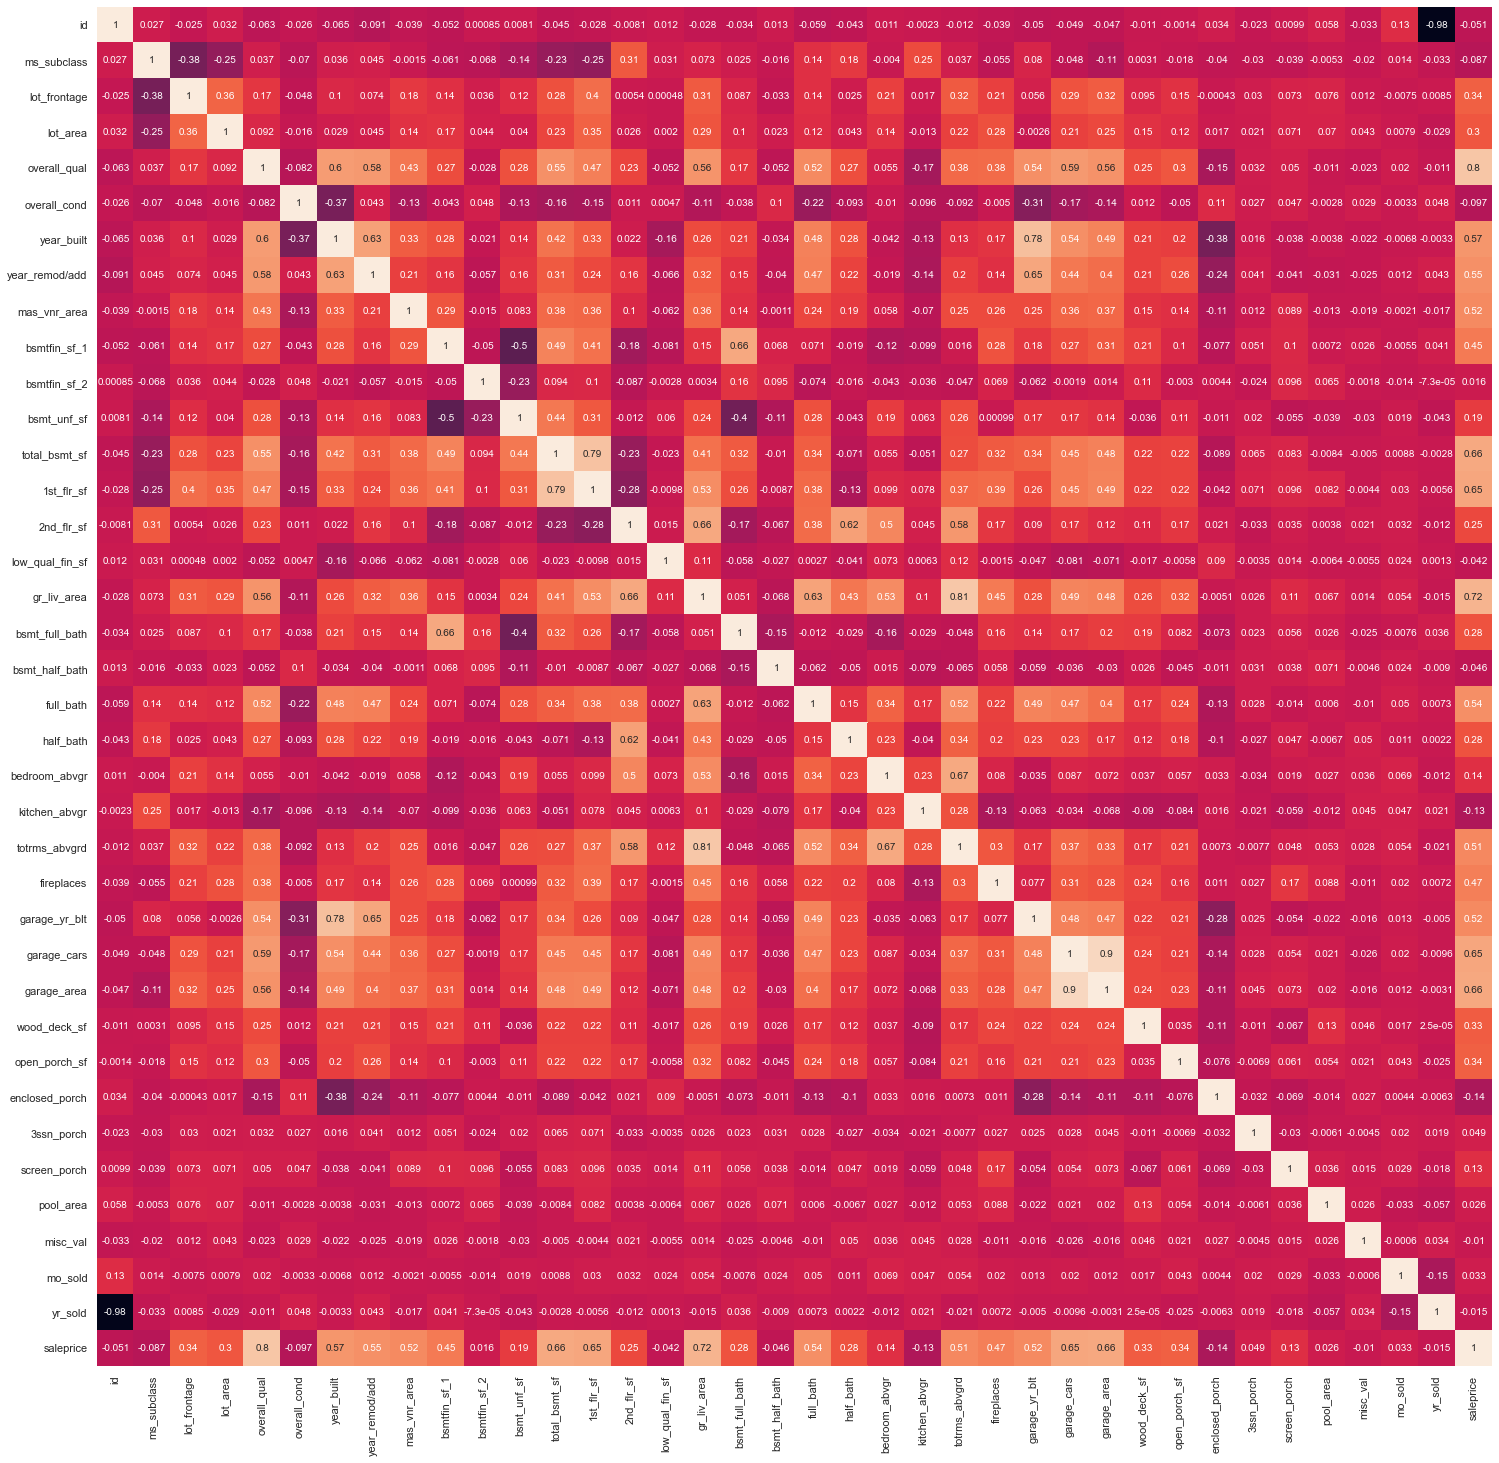

In [145]:
plt.figure(figsize=(25,25))
sns.heatmap(train.corr(), annot=True, cbar=False);

## Model Prep: Train/test split

In [186]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

## Model Prep: PowerTransformer
In the cell below, fit a PowerTransformer to X_train and use it to transform both X_train and X_test

In [146]:
pt = PowerTransformer()
pt.fit(X_train)
X_train = pt.transform(X_train)
X_test = pt.transform(X_test)

/Users/zhuoquanchen/.local/lib/python3.7/site-packages/numpy/core/_methods.py:195: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)


We also want to transform our target to resemble a normal distribution, so we'll create another PowerTrasformer for our y

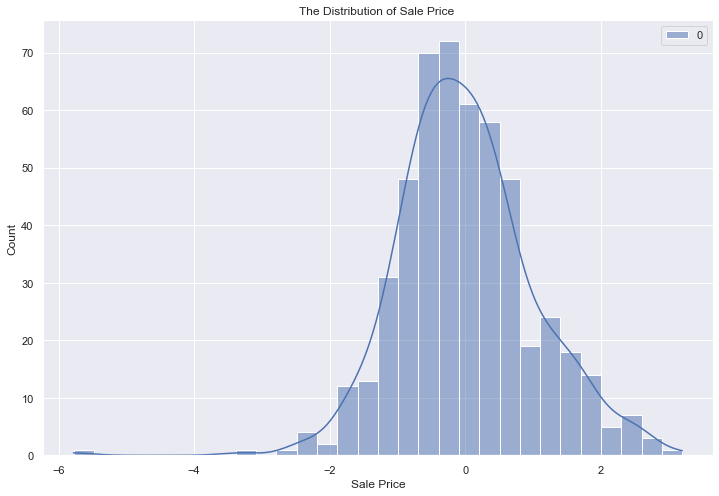

In [147]:
pt_y = PowerTransformer()
# PowerTransformer requires a matrix/DataFrame, which is why we're using the .to_frame() method on y_train
pt_y.fit(y_train.to_frame()) 
y_train_pt = pt_y.transform(y_train.to_frame())
y_test_pt = pt_y.transform(y_test.to_frame())

# plot it
plt.figure(figsize=(12, 8))
sns.histplot(y_test_pt, kde=True)
plt.title('The Distribution of Sale Price ')
plt.xlabel('Sale Price');

In [148]:
# Scale our data.
# Relabeling scaled data as "Z" is common.
sc = StandardScaler() # Z = (x-mean) / std (for each column)
Z_train = sc.fit_transform(X_train) # when we fit, we comput the mean_ and scale_ for each column
Z_test = sc.transform(X_test) # transforms using the mean/std computed on the training set

In [149]:
print(f'Z_train shape is: {Z_train.shape}')
print(f'y_train shape is: {y_train.shape}')
print(f'Z_test shape is: {Z_test.shape}')
print(f'y_test shape is: {y_test.shape}')

Z_train shape is: (1536, 37)
y_train shape is: (1536,)
Z_test shape is: (513, 37)
y_test shape is: (513,)


## OLS

In [209]:
ols = LinearRegression()
ols.fit(Z_train, y_train)

print("Train R2 Score: ", ols.score(Z_train, y_train))
print("RMSE = ", np.sqrt(metrics.mean_squared_error(y_test, ols.predict(X_test))))
print('')
print('OLS Prediction:')
ols_coef = pd.Series(ols.coef_, index=X.columns).sort_values(ascending=False)
ols_coef

Train R2 Score:  0.8438193704284043
RMSE =  144494558.44255444

OLS Prediction:


overall_qual       23114.895044
total_bsmt_sf      21761.073157
gr_liv_area        21036.984208
lot_area            7942.504061
totrms_abvgrd       6911.033889
year_built          6372.694240
year_remod/add      5246.380776
overall_cond        3832.603298
screen_porch        3615.175951
garage_cars         3110.250107
garage_yr_blt       2964.727892
fireplaces          2935.082394
bsmt_full_bath      2075.842987
lot_frontage        2002.682942
garage_area         1639.241056
2nd_flr_sf          1582.799405
wood_deck_sf        1536.709132
mas_vnr_area        1420.980570
half_bath           1366.537172
full_bath           1069.976473
3ssn_porch           781.621729
mo_sold              776.824676
enclosed_porch       676.301419
open_porch_sf        321.716396
pool_area           -130.409982
bsmt_half_bath      -270.362079
misc_val           -1004.827657
low_qual_fin_sf    -1189.571026
1st_flr_sf         -1225.536179
kitchen_abvgr      -2205.359193
bsmtfin_sf_1       -2579.775033
ms_subcl

In [151]:
# Evaluate model using R2.
print(ols.score(Z_train, y_train))
print(ols.score(Z_test, y_test))

0.8438193704284043
0.8606917875144996


## Rideg

In [208]:
# Set up a list of ridge alphas to check.
# np.logspace generates 100 values equally between 0 and 5,
# then converts them to alphas between 10^0 and 10^5.
r_alphas = np.logspace(1, 50, 100)

# Cross-validate over our list of ridge alphas.
ridge_cv = RidgeCV(alphas=r_alphas, scoring='r2', cv=5)

# Fit model using best ridge alpha!
ridge_cv.fit(Z_train, y_train)

print("Train R2 Score: ", ridge_cv.score(Z_train, y_train))
print("RMSE = ", np.sqrt(metrics.mean_squared_error(y_test, ridge_cv.predict(X_test))))
print('')
print("Ridge Prediction:")
ridge_coef = pd.Series(ridge_cv.coef_, index=X.columns).sort_values(ascending=False)
ridge_coef

Train R2 Score:  0.8431918269447516
RMSE =  154272325.5887177

Ridge Prediction:


overall_qual       22628.365065
total_bsmt_sf      18948.029186
gr_liv_area        16339.181026
lot_area            7708.443983
totrms_abvgrd       6975.058713
year_built          6373.455495
year_remod/add      5353.591266
2nd_flr_sf          4209.666658
overall_cond        3691.429892
screen_porch        3610.559054
garage_cars         3320.052898
fireplaces          3277.111962
garage_yr_blt       3064.542952
1st_flr_sf          3053.036281
bsmt_full_bath      2448.626693
lot_frontage        2097.655683
half_bath           2075.062959
garage_area         1967.007841
full_bath           1746.515243
wood_deck_sf        1683.237741
mas_vnr_area        1652.253926
mo_sold              784.820329
3ssn_porch           757.180295
enclosed_porch       731.204167
open_porch_sf        544.943297
pool_area           -192.669680
bsmt_half_bath      -237.380475
low_qual_fin_sf     -794.822209
bsmtfin_sf_1        -937.833382
misc_val           -1032.800950
kitchen_abvgr      -2270.953615
ms_subcl

In [153]:
# Evaluate model using R2.
print(ridge_cv.score(Z_train, y_train))
print(ridge_cv.score(Z_test, y_test))

0.8431918269447516
0.8596618930294272


## Lasso

In [207]:
# Set up a list of Lasso alphas to check.
l_alphas = np.logspace(1, 50, 100)

# Cross-validate over our list of Lasso alphas.
lasso_cv = LassoCV(alphas=l_alphas, cv=5, max_iter=50000)

# Fit model using best ridge alpha!
lasso_cv.fit(Z_train, y_train);

print("Alpha =", lasso_cv.alpha_)
print("Train R2 Score: ", lasso_cv.score(X_train, y_train))
print("RMSE = ", np.sqrt(metrics.mean_squared_error(y_test, lasso_cv.predict(X_test))))
print('')
print("Lasso Prediction::")
lasso_coef = pd.Series(lasso_cv.coef_, index=X.columns).sort_values(ascending=False)
lasso_coef

Alpha = 31.25715849688237
Train R2 Score:  -2928248.8386860285
RMSE =  148769535.38391483

Lasso Prediction::


overall_qual       23235.099912
total_bsmt_sf      21312.780051
gr_liv_area        20418.909912
lot_area            7928.046610
totrms_abvgrd       6847.698591
year_built          6377.583384
year_remod/add      5280.458870
overall_cond        3743.647572
screen_porch        3578.504447
garage_cars         3187.038179
fireplaces          2941.977940
garage_yr_blt       2940.634199
bsmt_full_bath      2037.939836
lot_frontage        1977.664295
2nd_flr_sf          1962.744739
garage_area         1606.948431
wood_deck_sf        1513.875119
half_bath           1456.546521
mas_vnr_area        1424.315630
full_bath           1087.335152
mo_sold              756.611203
3ssn_porch           737.206642
enclosed_porch       631.211937
open_porch_sf        306.813140
pool_area           -105.074234
bsmt_half_bath      -247.899365
1st_flr_sf          -513.589133
misc_val            -972.636858
low_qual_fin_sf    -1106.518985
kitchen_abvgr      -2186.639901
bsmtfin_sf_1       -2235.925228
ms_subcl

In [155]:
# Evaluate model using R2.
print(lasso_cv.score(Z_train, y_train))
print(lasso_cv.score(Z_test, y_test))

0.8437897199883111
0.8606587962462116


## Predict from test set

In [176]:
test.head(2)

,Id,MS SubClass,Lot Frontage,Lot Area,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,Sale Type
0,2658,190,69.000000,9142,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,2fmCon,2Story,6,8,1910,1950,Gable,CompShg,AsbShng,AsbShng,None,0.0,TA,Fa,Stone,Fa,TA,No,Unf,0,Unf,0,1020,1020,GasA,Gd,N,FuseP,908,1020,0,1928,0,0,2,0,4,2,Fa,9,Typ,0,Detchd,1910.0,Unf,1,440,Po,Po,Y,0,60,112,0,0,0,0,4,2006,WD
1,2718,90,69.545961,9662,IR1,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,Duplex,1Story,5,4,1977,1977,Gable,CompShg,Plywood,Plywood,None,0.0,TA,TA,CBlock,Gd,TA,No,Unf,0,Unf,0,1967,1967,GasA,TA,Y,SBrkr,1967,0,0,1967,0,0,2,0,6,2,TA,10,Typ,0,Attchd,1977.0,Fin,2,580,TA,TA,Y,170,0,0,0,0,0,0,8,2006,WD


In [181]:
features_test = test[test._get_numeric_data().columns]
X_TEST = features_test
X_TEST.shape

(878, 37)

In [187]:
X_train

,id,ms_subclass,lot_frontage,lot_area,overall_qual,overall_cond,year_built,year_remod/add,mas_vnr_area,bsmtfin_sf_1,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,totrms_abvgrd,fireplaces,garage_yr_blt,garage_cars,garage_area,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,misc_val,mo_sold,yr_sold
415,2045,70,107.0000,12888,7,8,1937,1980,0.0,288.0,0.0,717.0,1005.0,1262,1005,0,2267,1.0,0.0,1,1,3,1,7,2,1937.0,2.0,498.0,521,0,0,0,0,0,0,4,2007
273,1962,20,60.0000,7200,5,8,1950,2002,0.0,398.0,149.0,317.0,864.0,864,0,0,864,1.0,0.0,1,0,3,1,5,0,1980.0,2.0,720.0,194,0,0,0,0,0,0,7,2007
1147,445,20,85.0000,10655,8,5,2003,2004,296.0,1124.0,479.0,1603.0,3206.0,1629,0,0,1629,1.0,0.0,2,0,3,1,7,1,2003.0,3.0,880.0,0,0,0,0,0,0,0,10,2009
250,1105,60,69.0552,11929,8,7,1995,1995,466.0,0.0,0.0,1242.0,1242.0,1251,1250,0,2501,0.0,0.0,2,1,4,1,9,1,1995.0,3.0,751.0,192,87,0,0,0,0,0,6,2008
413,909,50,60.0000,9900,6,7,1940,1950,0.0,0.0,0.0,778.0,778.0,944,545,0,1489,0.0,0.0,2,0,3,1,7,1,1940.0,1.0,240.0,335,0,0,0,0,0,0,7,2009
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1725,1257,50,60.0000,10930,5,6,1945,1950,0.0,580.0,0.0,333.0,913.0,1048,510,0,1558,1.0,0.0,1,1,3,1,6,1,1962.0,1.0,288.0,0,0,0,0,0,0,0,4,2008
1096,2714,60,74.0000,7844,6,7,1978,1978,203.0,209.0,0.0,463.0,672.0,672,728,0,1400,0.0,0.0,1,1,3,1,6,1,1978.0,2.0,440.0,0,0,0,0,0,0,0,3,2006
1131,2911,160,42.0000,3964,6,4,1973,1973,0.0,837.0,0.0,105.0,942.0,1291,1230,0,2521,1.0,0.0,2,1,5,1,10,1,1973.0,2.0,576.0,728,20,0,0,0,0,0,6,2006
1295,231,30,94.0000,9259,4,4,1927,1950,0.0,0.0,0.0,660.0,660.0,756,0,0,756,0.0,0.0,1,0,2,1,4,0,1945.0,2.0,440.0,80,0,0,0,0,0,0,6,2010


In [ ]:
ss = StandardScaler()
ss.fit(X_train) #get the mean and std
Z_train = ss.transform(X_train)
Z_test = ss.transform(X_TEST)

In [206]:
lasso_alphas = np.logspace(0, 100, 200)
lasso = LassoCV(alphas=lasso_alphas, cv=5, max_iter=50000)
lasso.fit(Z_train, y_train);
print('Alpha:', lasso.alpha_)
print('')
print('Lasso Coefficients:')
print(lasso.coef_)
print('')
print('Lasso Prediction:')
pd.Series(lasso.coef_, index=X.columns).sort_values(ascending=False)

Alpha: 32.176417502507356

Lasso Coefficients:
[ -7411.22071687  -3372.27109803   1976.93117412   7927.62673457
  23238.64457108   3741.02347328   6377.69395316   5281.46130364
   1424.41058166  -2225.8197105   -4527.48792798 -13140.31624086
  21299.6340067    -493.07195354   1973.54346672  -1104.12132898
  20401.15678373   2036.82202108   -247.241065     1087.84737928
   1459.17597579  -8110.76866929  -2186.0956259    6845.84463952
   2942.17813166   2939.91710332   3189.2827971    1606.01089619
   1513.20143895    306.37109672    629.8758325     735.89950365
   3577.4221267    -104.32359326   -971.68961358    756.01500862
  -8496.71449527]

Lasso Prediction:


overall_qual       23238.644571
total_bsmt_sf      21299.634007
gr_liv_area        20401.156784
lot_area            7927.626735
totrms_abvgrd       6845.844640
year_built          6377.693953
year_remod/add      5281.461304
overall_cond        3741.023473
screen_porch        3577.422127
garage_cars         3189.282797
fireplaces          2942.178132
garage_yr_blt       2939.917103
bsmt_full_bath      2036.822021
lot_frontage        1976.931174
2nd_flr_sf          1973.543467
garage_area         1606.010896
wood_deck_sf        1513.201439
half_bath           1459.175976
mas_vnr_area        1424.410582
full_bath           1087.847379
mo_sold              756.015009
3ssn_porch           735.899504
enclosed_porch       629.875833
open_porch_sf        306.371097
pool_area           -104.323593
bsmt_half_bath      -247.241065
1st_flr_sf          -493.071954
misc_val            -971.689614
low_qual_fin_sf    -1104.121329
kitchen_abvgr      -2186.095626
bsmtfin_sf_1       -2225.819711
ms_subcl

In [194]:
test['y_hat'] = lasso.predict(X_TEST)

In [195]:
test.head()

,Id,MS SubClass,Lot Frontage,Lot Area,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,Sale Type,y_hat
0,2658,190,69.000000,9142,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,2fmCon,2Story,6,8,1910,1950,Gable,CompShg,AsbShng,AsbShng,None,0.0,TA,Fa,Stone,Fa,TA,No,Unf,0,Unf,0,1020,1020,GasA,Gd,N,FuseP,908,1020,0,1928,0,0,2,0,4,2,Fa,9,Typ,0,Detchd,1910.0,Unf,1,440,Po,Po,Y,0,60,112,0,0,0,0,4,2006,WD,153723.144475
1,2718,90,69.545961,9662,IR1,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,Duplex,1Story,5,4,1977,1977,Gable,CompShg,Plywood,Plywood,None,0.0,TA,TA,CBlock,Gd,TA,No,Unf,0,Unf,0,1967,1967,GasA,TA,Y,SBrkr,1967,0,0,1967,0,0,2,0,6,2,TA,10,Typ,0,Attchd,1977.0,Fin,2,580,TA,TA,Y,170,0,0,0,0,0,0,8,2006,WD,164966.940209
2,2414,60,58.000000,17104,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,7,5,2006,2006,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,Gd,Av,GLQ,554,Unf,0,100,654,GasA,Ex,Y,SBrkr,664,832,0,1496,1,0,2,1,3,1,Gd,7,Typ,1,Attchd,2006.0,RFn,2,426,TA,TA,Y,100,24,0,0,0,0,0,9,2006,New,237780.409335
3,1989,30,60.000000,8520,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,1Fam,1Story,5,6,1923,2006,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,Gd,TA,CBlock,TA,TA,No,Unf,0,Unf,0,968,968,GasA,TA,Y,SBrkr,968,0,0,968,0,0,1,0,2,1,TA,5,Typ,0,Detchd,1935.0,Unf,2,480,Fa,TA,N,0,0,184,0,0,0,0,7,2007,WD,117471.637090
4,625,20,69.545961,9500,IR1,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1963,1963,Gable,CompShg,Plywood,Plywood,BrkFace,247.0,TA,TA,CBlock,Gd,TA,No,BLQ,609,Unf,0,785,1394,GasA,Gd,Y,SBrkr,1394,0,0,1394,1,0,1,1,3,1,TA,6,Typ,2,Attchd,1963.0,RFn,2,514,TA,TA,Y,0,76,0,0,185,0,0,7,2009,WD,199332.165139


In [196]:
test.shape

(878, 73)

## Create our submission Dataframe

In [198]:
submission = pd.DataFrame({'Id' : test['Id'],
                           'saleprice' : test['y_hat']})

In [199]:
submission.head()

,Id,saleprice
0,2658,153723.144475
1,2718,164966.940209
2,2414,237780.409335
3,1989,117471.637090
4,625,199332.165139


In [200]:
submission.shape

(878, 2)

## Export as a CSV

In [201]:
submission.to_csv('my_sumbission.csv', index = False)